In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d_r = pd.read_csv("data.csv")
t_r = pd.read_csv("test.csv")

In [3]:
d_r.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
t_r.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
d_r.shape

(42000, 785)

In [6]:
y=d_r['label']
x=d_r.drop('label',axis=1)

In [7]:
x_test_data=t_r[:]

6


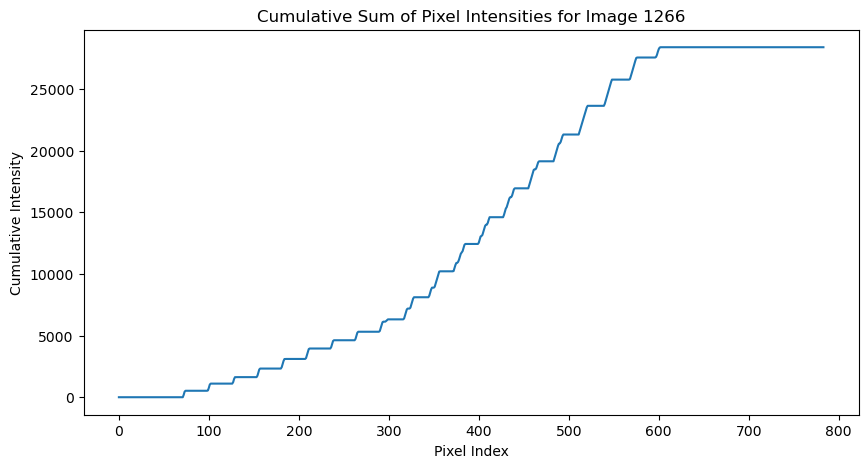

In [9]:
plt.figure(figsize=(10,5))
s1 = 1266
s1_image = x.iloc[s1].to_numpy()
cumulative_sum = np.cumsum(s1_image)
plt.plot(cumulative_sum)
plt.title(f'Cumulative Sum of Pixel Intensities for Image {s1}')
plt.xlabel('Pixel Index')
plt.ylabel('Cumulative Intensity')
print(y[s1])
plt.show()

<Axes: xlabel='label', ylabel='count'>

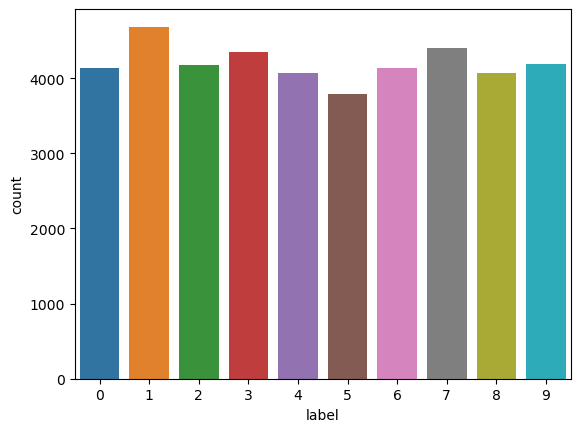

In [11]:
sns.countplot( x='label', data=d_r)

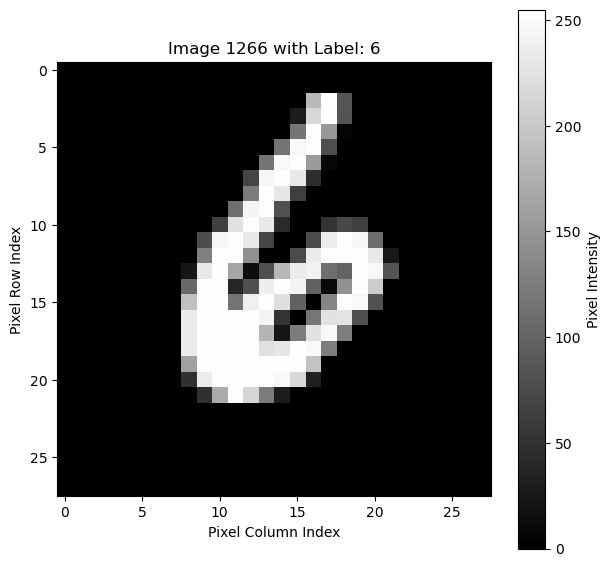

6


In [12]:
s1 = 1266
s1_image = x.iloc[s1].to_numpy()
reshaped_image = np.reshape(s1_image, (28,28))
plt.figure(figsize=(7,7))
plt.imshow(reshaped_image, cmap='gray')
plt.title(f'Image {s1} with Label: {y[s1]}')
plt.xlabel('Pixel Column Index')
plt.ylabel('Pixel Row Index')
plt.colorbar(label='Pixel Intensity')
plt.show()
print(y[s1])

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
def train_and_evaluate_knn(X, y, k, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, conf_matrix

In [14]:
from sklearn.model_selection import  train_test_split
k_values = [2, 4, 5, 6, 7, 10]
test_sizes = [0.40, 0.30, 0.25, 0.20, 0.10, 0.05]

results = []

for k in k_values:
    for test_size in test_sizes:
        try:
            accuracy, conf_matrix = train_and_evaluate_knn(x, y, k, test_size)
            result = {
                'k': k,
                'test_size': test_size,
                'accuracy': accuracy,
                'confusion_matrix': conf_matrix
            }
            results.append(result)
            
            # Display intermediate results
            print(f"k={k}, test_size={test_size}")
            print(f"Accuracy: {accuracy}")
            print(f"Confusion Matrix:\n{conf_matrix}\n")
        
        except Exception as e:
            print(f"An error occurred for k={k}, test_size={test_size}: {e}")


k=2, test_size=0.4
Accuracy: 0.9567261904761905
Confusion Matrix:
[[1621    0    1    0    0    0    4    0    0    0]
 [   0 1847    2    0    1    0    0    1    0    0]
 [  17   27 1627    3    2    2    0   12    3    1]
 [   2    9   17 1711    0   15    1    8    9    4]
 [   3   19    0    0 1587    0    3    3    0   18]
 [   5    5    1   56    5 1375   12    0    3    5]
 [  24    5    1    1    4    9 1650    0    0    0]
 [   1   27   12    0    6    1    0 1714    0   12]
 [  14   22   19   55    9   45    8    7 1450   10]
 [  11    8    2   19   50    6    1   55    4 1491]]

k=2, test_size=0.3
Accuracy: 0.9600793650793651
Confusion Matrix:
[[1197    0    0    0    0    0    3    0    0    0]
 [   0 1387    1    0    1    0    0    0    0    0]
 [  15   20 1240    3    1    1    1   10    3    0]
 [   1    6   15 1305    0    9    1    6    9    3]
 [   2   12    0    0 1190    0    4    3    0   11]
 [   1    3    0   36    4 1031    5    0    2    3]
 [  13    2    1  

k=5, test_size=0.2
Accuracy: 0.9648809523809524
Confusion Matrix:
[[812   0   0   0   0   0   4   0   0   0]
 [  0 906   0   0   0   0   3   0   0   0]
 [  6  15 796   3   2   2   1  20   1   0]
 [  2   4   4 900   0   9   1   6   5   6]
 [  1   5   0   0 811   0   3   1   0  18]
 [  1   2   0  15   1 669   9   0   1   4]
 [  5   0   0   0   0   3 777   0   0   0]
 [  0  18   2   0   1   0   0 857   0  15]
 [  1  12   2  12   3  15   4   1 777   8]
 [  3   3   1  10   6   1   0  12   2 800]]

k=5, test_size=0.1
Accuracy: 0.9654761904761905
Confusion Matrix:
[[408   0   0   0   0   0   0   0   0   0]
 [  0 469   0   0   0   0   2   0   0   0]
 [  3   6 402   0   2   0   0   7   0   0]
 [  1   2   4 485   0   5   0   3   3   3]
 [  0   1   0   0 383   0   2   0   0  11]
 [  0   0   0   6   0 325   5   0   1   2]
 [  4   0   0   0   0   2 396   0   0   0]
 [  0  14   1   0   1   0   0 416   0   6]
 [  1   6   1   7   2   7   3   1 372   3]
 [  1   1   1   6   2   0   0   6   0 399]]

k=5,

k=10, test_size=0.3
Accuracy: 0.9608730158730159
Confusion Matrix:
[[1196    0    0    0    0    0    4    0    0    0]
 [   0 1384    1    0    0    0    4    0    0    0]
 [  13   24 1211    5    3    2    4   24    7    1]
 [   4    8    7 1295    0   13    1   12    8    7]
 [   2   14    0    0 1174    0    6    2    0   24]
 [   2    4    0   26    2 1028   13    1    1    8]
 [  10    3    1    0    2    2 1236    0    2    0]
 [   0   30    2    0    3    0    0 1306    0   18]
 [   1   20    4   20    7   24    7    1 1110   15]
 [   8    4    4   13    9    0    1   23    2 1167]]

k=10, test_size=0.25
Accuracy: 0.962
Confusion Matrix:
[[1022    0    0    0    0    0    3    0    0    0]
 [   0 1142    0    0    1    0    3    0    0    0]
 [  11   22 1001    4    2    2    4   20    5    1]
 [   3    7    4 1106    0    8    1    9    6    7]
 [   2   10    0    0  988    0    5    2    0   17]
 [   2    3    0   18    2  853   12    1    1    6]
 [  11    3    0    0    0  

In [15]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('knn_analysis.pdf') as pdf:
    for result in results:
        k = result['k']
        test_size = result['test_size']
        conf_matrix = result['confusion_matrix']
        
        fig, ax = plt.subplots()
        cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
        plt.title(f'Confusion Matrix (k={k}, test_size={test_size})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        fig.colorbar(cax)
        pdf.savefig(fig)
        plt.close()

    fig, ax = plt.subplots()
    for k in k_values:
        ts_values = [r['test_size'] for r in results if r['k'] == k]
        accuracies = [r['accuracy'] for r in results if r['k'] == k]
        ax.plot(ts_values, accuracies, label=f'k={k}')
    plt.title('Accuracy vs. Test Size for different k values')
    plt.xlabel('Test Size')
    plt.ylabel('Accuracy')
    plt.legend()
    pdf.savefig(fig)
    plt.close()
